<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,90.579268,50.702186,43.358629,25.661172,-207.641470,12.659785,202.767031,-190.107246
1,0.0,1.0,94.751306,65.498329,35.952616,35.737732,335.132552,577.072535,240.552864,336.519671
2,0.0,2.0,29.275019,86.408435,93.164879,88.716529,-53.770108,253.794754,233.179387,20.615367
3,0.0,3.0,89.362586,46.385074,83.717093,20.180815,-119.010609,130.634960,135.157336,-4.522376
4,0.0,4.0,86.731834,97.027494,49.029508,35.302342,-67.054258,211.036921,218.811361,-7.774440
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,51.230414,25.393961,55.119997,34.576109,-71.049115,105.271365,142.304108,-37.032742
119996,999.0,116.0,37.769925,74.444839,65.698320,58.328337,-239.159967,7.081454,217.683917,-210.602463
119997,999.0,117.0,33.766220,49.203259,84.597886,86.621007,87.074251,351.262623,259.859502,91.403120
119998,999.0,118.0,97.654739,78.501191,63.245383,31.405095,-336.991843,-56.185434,179.059529,-235.244963


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    90.579268  50.702186  43.358629  25.661172 -207.641470   
      1.0    94.751306  65.498329  35.952616  35.737732  335.132552   
      2.0    29.275019  86.408435  93.164879  88.716529  -53.770108   
      3.0    89.362586  46.385074  83.717093  20.180815 -119.010609   
      4.0    86.731834  97.027494  49.029508  35.302342  -67.054258   
...                ...        ...        ...        ...         ...   
999.0 115.0  51.230414  25.393961  55.119997  34.576109  -71.049115   
      116.0  37.769925  74.444839  65.698320  58.328337 -239.159967   
      117.0  33.766220  49.203259  84.597886  86.621007   87.074251   
      118.0  97.654739  78.501191  63.245383  31.405095 -336.991843   
      119.0  86.503778  38.254365  40.746892  70.308322  181.736076   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0     12.659785  202.767031 -190.107246  
      1.0    577.072535  240.552864  336.519671  
      2.0    253.794754  233.179387   20.615367  
      3.0    130.634960  135.157336   -4.522376  
      4.0    211.036921  218.811361   -7.774440  
...                 ...         ...         ...  
999.0 115.0  105.271365  142.304108  -37.032742  
      116.0    7.081454  217.683917 -210.602463  
      117.0  351.262623  259.859502   91.403120  
      118.0  -56.185434  179.059529 -235.244963  
      119.0  427.549433  255.866055  171.683378  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    90.579268  50.702186  43.358629  25.661172 -207.641470   
      1.0    94.751306  65.498329  35.952616  35.737732  335.132552   
      2.0    29.275019  86.408435  93.164879  88.716529  -53.770108   
      3.0    89.362586  46.385074  83.717093  20.180815 -119.010609   
      4.0    86.731834  97.027494  49.029508  35.302342  -67.054258   
...                ...        ...        ...        ...         ...   
999.0 115.0  51.230414  25.393961  55.119997  34.576109  -71.049115   
      116.0  37.769925  74.444839  65.698320  58.328337 -239.159967   
      117.0  33.766220  49.203259  84.597886  86.621007   87.074251   
      118.0  97.654739  78.501191  63.245383  31.405095 -336.991843   
      119.0  86.503778  38.254365  40.746892  70.308322  181.736076   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0     12.659785  202.767031 -190.107246  
      1.0    577.072535  240.552864  336.519671  
      2.0    253.794754  233.179387   20.615367  
      3.0    130.634960  135.157336   -4.522376  
      4.0    211.036921  218.811361   -7.774440  
...                 ...         ...         ...  
999.0 115.0  105.271365  142.304108  -37.032742  
      116.0    7.081454  217.683917 -210.602463  
      117.0  351.262623  259.859502   91.403120  
      118.0  -56.185434  179.059529 -235.244963  
      119.0  427.549433  255.866055  171.683378  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,90.579268,50.702186,43.358629,25.661172,-207.641470,12.659785,202.767031,-190.107246
1,0.0,1.0,94.751306,65.498329,35.952616,35.737732,335.132552,577.072535,240.552864,336.519671
2,0.0,2.0,29.275019,86.408435,93.164879,88.716529,-53.770108,253.794754,233.179387,20.615367
3,0.0,3.0,89.362586,46.385074,83.717093,20.180815,-119.010609,130.634960,135.157336,-4.522376
4,0.0,4.0,86.731834,97.027494,49.029508,35.302342,-67.054258,211.036921,218.811361,-7.774440
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,51.230414,25.393961,55.119997,34.576109,-71.049115,105.271365,142.304108,-37.032742
119996,999.0,116.0,37.769925,74.444839,65.698320,58.328337,-239.159967,7.081454,217.683917,-210.602463
119997,999.0,117.0,33.766220,49.203259,84.597886,86.621007,87.074251,351.262623,259.859502,91.403120
119998,999.0,118.0,97.654739,78.501191,63.245383,31.405095,-336.991843,-56.185434,179.059529,-235.244963


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    90.579268  50.702186  43.358629  25.661172 -207.641470   
      1.0    94.751306  65.498329  35.952616  35.737732  335.132552   
      2.0    29.275019  86.408435  93.164879  88.716529  -53.770108   
      3.0    89.362586  46.385074  83.717093  20.180815 -119.010609   
      4.0    86.731834  97.027494  49.029508  35.302342  -67.054258   
...                ...        ...        ...        ...         ...   
999.0 115.0  51.230414  25.393961  55.119997  34.576109  -71.049115   
      116.0  37.769925  74.444839  65.698320  58.328337 -239.159967   
      117.0  33.766220  49.203259  84.597886  86.621007   87.074251   
      118.0  97.654739  78.501191  63.245383  31.405095 -336.991843   
      119.0  86.503778  38.254365  40.746892  70.308322  181.736076   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0     12.659785  202.767031 -190.107246  
      1.0    577.072535  240.552864  336.519671  
      2.0    253.794754  233.179387   20.615367  
      3.0    130.634960  135.157336   -4.522376  
      4.0    211.036921  218.811361   -7.774440  
...                 ...         ...         ...  
999.0 115.0  105.271365  142.304108  -37.032742  
      116.0    7.081454  217.683917 -210.602463  
      117.0  351.262623  259.859502   91.403120  
      118.0  -56.185434  179.059529 -235.244963  
      119.0  427.549433  255.866055  171.683378  

[120000 rows x 8 columns]

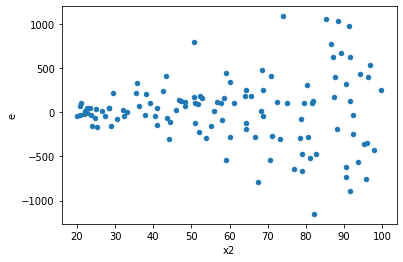

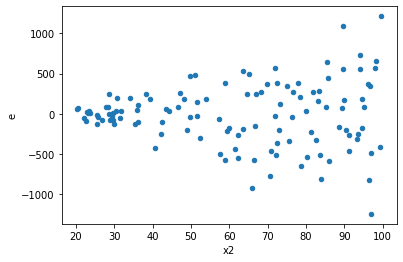

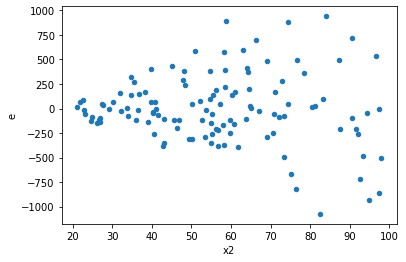

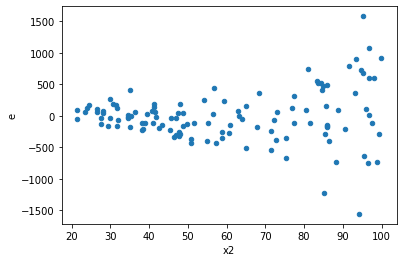

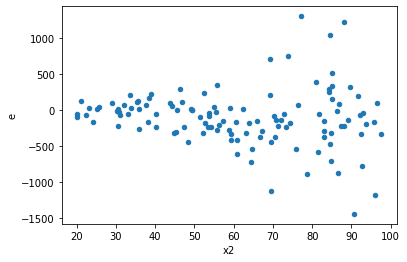

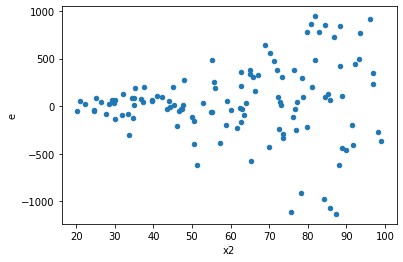

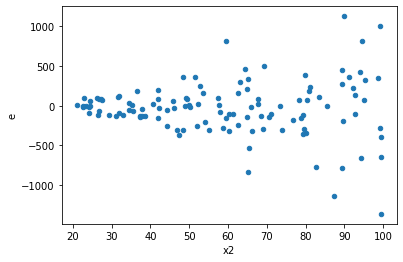

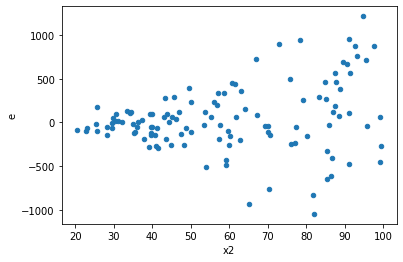

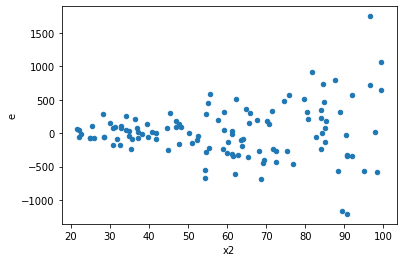

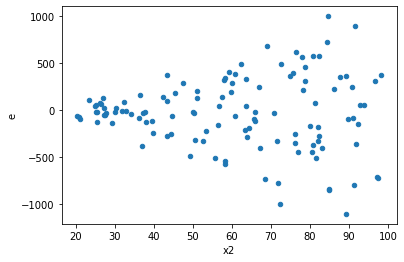

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,57.0,55.0,5404772.382143433,8447950.123129955,94820.56810777953,153599.09314781736,1.6198921416841348,0.07445235699169417,0.9627738215041529,0.037226178495847084,Reject005=1 : Homoscedasticity
6.0,53.0,59.0,5825890.494204694,10507516.844541866,109922.46215480556,178093.50583969266,1.6201739148535514,0.07206383603917854,0.9639680819804107,0.03603191801958927,Reject005=1 : Homoscedasticity
10.0,63.0,49.0,6907798.668433558,10367844.391970519,109647.59791164378,211588.66106062284,1.9297154255137006,0.01800466668598988,0.9909976666570051,0.00900233334299494,Reject005=0 : Heteroscedasticity
11.0,62.0,50.0,4907377.068359444,10671338.927239224,79151.24303805555,213426.7785447845,2.6964425365015416,0.0004089101727453581,0.9997955449136273,0.00020445508637267906,Reject005=0 : Heteroscedasticity
12.0,48.0,64.0,4279215.043982068,8844960.63119698,89150.31341629308,138202.5098624528,1.550219001666403,0.10108434904565389,0.9494578254771731,0.050542174522826944,Reject005=1 : Homoscedasticity
13.0,63.0,49.0,5267872.078693134,13312233.758008389,83617.01712211323,271678.23995935486,3.249078349238402,3.558218337973429e-05,0.9999822089083101,1.7791091689867145e-05,Reject005=0 : Heteroscedasticity
15.0,62.0,50.0,6118922.291557983,10696697.68767086,98692.29502512875,213933.9537534172,2.167686481492258,0.005364407819086869,0.9973177960904566,0.0026822039095434347,Reject005=0 : Heteroscedasticity
17.0,69.0,43.0,3456488.3382827756,12475784.795659177,50094.03388815617,290134.5301316088,5.79179809674313,1.3878572957537472e-08,0.9999999930607135,6.939286478768736e-09,Reject005=0 : Heteroscedasticity
19.0,49.0,63.0,6435808.943083488,8326452.033402973,131343.03965476507,132165.9052921107,1.0062650113740974,0.9726078538296548,0.5136960730851726,0.4863039269148274,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,60.0,52.0,5707677.024318008,4829860.101743667,95127.95040530013,92881.92503353207,0.9763894274795295,0.9241587961965222,Reject005=1 : Homoscedasticity
1.0,66.0,46.0,7870914.967871488,3365654.302341768,119256.28739199224,73166.39787699496,0.6135223515427657,0.06814209129711137,Reject005=1 : Homoscedasticity
2.0,43.0,69.0,6858489.924454269,7876668.223654408,159499.765684983,114154.61193702041,0.7157039475686712,0.24099450157546043,Reject005=1 : Homoscedasticity
3.0,57.0,55.0,7493987.950588714,4955349.053698348,131473.47281734587,90097.25552178815,0.6852884737209225,0.1595664063002695,Reject005=1 : Homoscedasticity
4.0,47.0,65.0,8255381.118356019,8636323.931875154,175646.40677353233,132866.52202884853,0.7564431545710949,0.3161163450338913,Reject005=1 : Homoscedasticity
5.0,57.0,55.0,5404772.382143433,8447950.123129955,94820.56810777953,153599.09314781736,1.6198921416841348,0.07445235699169417,Reject005=1 : Homoscedasticity
6.0,53.0,59.0,5825890.494204694,10507516.844541866,109922.46215480556,178093.50583969266,1.6201739148535514,0.07206383603917854,Reject005=1 : Homoscedasticity
7.0,55.0,57.0,6684845.226334545,6491920.5936561255,121542.6404788099,113893.34374835307,0.9370649123606095,0.8099948709473558,Reject005=1 : Homoscedasticity
8.0,56.0,56.0,10082899.919336215,4524758.809795826,180051.78427386098,80799.26446063975,0.4487556998476787,0.003215184589389154,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    560
Reject005=1 : Homoscedasticity      440
Name: Result_test, dtype: int64